# Natural forest
Input: 
- Forest4model_v1_Natural_forests

Aim:
- TODO: Visualising the distribution of natural forests in sample countries
- Calculating percentage share of natural forests over country's total forest cover

Output:
- A dataframe containing the percentage share of natural forests in 32 EU countries

In [9]:
# Vector data
import geopandas as gpd

# Tabular data 
import pandas as pd
import numpy as np

# Raster array
import xarray as xr

# Plotting
import matplotlib.pyplot as plt

# System
from pathlib import Path

# Import functions from geo_tools module
from geo_tools import utils, forest_barplot, plot_iso_forest

# Reloads module
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Output directory

In [2]:
# Specify the desired output folder path for processed dataset
output_data_dir = Path.cwd() / ".." / "output_data"

# Check if the output folder exists, and create if not
Path.mkdir(output_data_dir, exist_ok=True, parents=True)

In [3]:
# Specify the desired output folder path for figures
output_figure_dir = Path.cwd() / ".." / "output_figures"

# Check if the output folder exists, and create if not
Path.mkdir(output_figure_dir, exist_ok=True, parents=True)

# A list of ISO3 codes of EU countries

In [4]:
eu_iso3 = pd.read_csv(output_data_dir/"Country_Codes_and_Names_ISO3.csv")

eu_iso = eu_iso3["ISO3"]

# Plotting data distribution
TODO: Visualising the distribution of natural forests in sample countries
Plot them using categorical colorbar

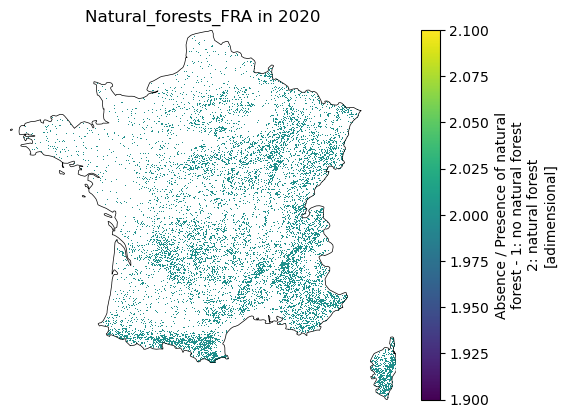

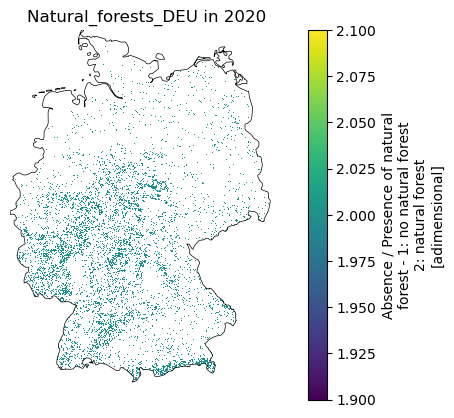

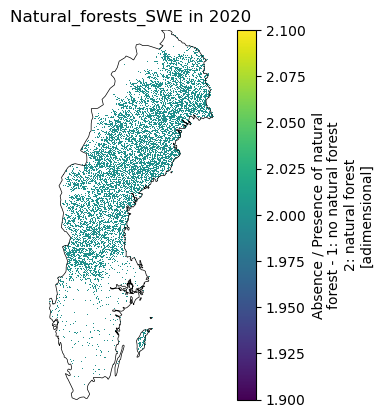

In [6]:
for iso_ex in ["FRA", "DEU", "SWE"]:
    plot_iso_forest.plot_forest_type(
        iso_code=iso_ex,
        xarray_id="Natural_forests",
        forest_type_cat=2
    )

# Calculating area

In [13]:
%%time
# Template to store total area in Mha
natural_mha = []

# Template to store total area in percentage share
natural_perc = []

# Import forest cover data
forest_cover = pd.read_csv(output_data_dir/"iso_forest_cover_stats.csv").drop(["Unnamed: 0"], axis=1)

for iso in eu_iso:

    # Calculate area of undefined forest
    iso_natural = plot_iso_forest.agg_area_natural_forest(
        iso_code=iso, 
        xarray_id="Natural_forests", 
        forest_layer_year=2020
    )
    natural_mha.append(iso_natural)

    # Get forest cover area within the country
    iso_forest_cover = forest_cover.loc[forest_cover.Region == iso]
    value_to_copy = iso_forest_cover.iloc[0, 5]

    # Copy forest cover to iso_natural
    iso_natural[f"{iso}_forest_cover_Mha"] = value_to_copy

    # Calculate percentage share of fraction classes over total forest cover
    iso_natural["Percentage share"] = iso_natural["Value"] / iso_natural[f"{iso}_forest_cover_Mha"]

    # Creating final dataset
    iso_natural_perc = iso_natural.drop(["Unit", "Value", f"{iso}_forest_cover_Mha"], axis=1)

    iso_natural_perc.insert(
        loc=4,
        column="Unit",
        value="Percentage share"
    )

    iso_natural_perc.rename(
        columns={"Percentage share" : "Value"},
        inplace=True
    )
    natural_perc.append(iso_natural_perc)

natural_perc_df = pd.concat(natural_perc)

CPU times: user 44.7 s, sys: 10.5 s, total: 55.2 s
Wall time: 7min 46s


In [14]:
natural_perc_df

,Region,Variable,Var_uid,Year,Unit,Value
0,BGR,Natural forests,natural_forests,2020,Percentage share,0.752076
0,CYP,Natural forests,natural_forests,2020,Percentage share,0.683371
0,DNK,Natural forests,natural_forests,2020,Percentage share,0.110464
0,IRL,Natural forests,natural_forests,2020,Percentage share,0.039428
0,EST,Natural forests,natural_forests,2020,Percentage share,0.573446
0,AUT,Natural forests,natural_forests,2020,Percentage share,0.570916
0,CZE,Natural forests,natural_forests,2020,Percentage share,0.348007
0,FIN,Natural forests,natural_forests,2020,Percentage share,0.528511
0,FRA,Natural forests,natural_forests,2020,Percentage share,0.538151
0,DEU,Natural forests,natural_forests,2020,Percentage share,0.288135


# Exporting the processed dataset

In [15]:
natural_perc_df.to_csv(output_data_dir/"iso_natural_forests.csv")